In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from pylab import rcParams
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

In [2]:
df1=pd.read_csv("C:/Users/Swarupa/Desktop/Terrorism.csv")

C:\Users\Swarupa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df=df1[['iyear','imonth','iday',"individual","nperps","nperpcap","nkill","nkillus","nkillter","nwound","nwoundus","nwoundte","propvalue","nhostkid","nhostkidus","nhours","ndays","ransomamt","ransomamtus","ransompaid","ransompaidus","nreleased"]]

In [4]:
df.head()

,iyear,imonth,iday,individual,nperps,nperpcap,nkill,nkillus,nkillter,nwound,...,propvalue,nhostkid,nhostkidus,nhours,ndays,ransomamt,ransomamtus,ransompaid,ransompaidus,nreleased
0,1970,7,2,0,NaN,NaN,1.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970,0,0,0,7.0,NaN,0.0,NaN,NaN,0.0,...,NaN,1.0,0.0,NaN,NaN,800000.0,NaN,NaN,NaN,NaN
2,1970,1,0,0,NaN,NaN,1.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df2=df[df.columns.difference(['iyear','imonth','iday'])]

In [6]:
df2.head()

,individual,ndays,nhostkid,nhostkidus,nhours,nkill,nkillter,nkillus,nperpcap,nperps,nreleased,nwound,nwoundte,nwoundus,propvalue,ransomamt,ransomamtus,ransompaid,ransompaidus
0,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,1.0,0.0,NaN,0.0,NaN,NaN,NaN,7.0,NaN,0.0,NaN,NaN,NaN,800000.0,NaN,NaN,NaN
2,0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df2.shape

(170350, 19)

In [37]:
df2.fillna(0,inplace=True)
mat=df2.as_matrix(columns=None)
mat=np.transpose(mat)
for i in range(19):
    mat[i]=(mat[i]/mat[i].max())*100
mat=np.transpose(mat)   

C:\Users\Swarupa\Anaconda3\lib\site-packages\pandas\core\frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [38]:
mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.00588235, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.32599837,  0.19411765, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
pca=decomposition.PCA()
pca_t= pca.fit_transform(mat)

In [40]:
pca.explained_variance_ratio_[0]

0.57558617644911658

In [41]:
pca.explained_variance_ratio_

array([ 0.57558618,  0.13604499,  0.11519226,  0.04807053,  0.04282084,
        0.01766599,  0.01692641,  0.01160242,  0.00996244,  0.00541232,
        0.0036477 ,  0.00351468,  0.00283994,  0.00267922,  0.00243377,
        0.00175548,  0.00167445,  0.00132652,  0.00084387])

In [42]:
components= pd.DataFrame(pca.components_,columns = df2.columns.values)

In [43]:
components

,individual,ndays,nhostkid,nhostkidus,nhours,nkill,nkillter,nkillus,nperpcap,nperps,nreleased,nwound,nwoundte,nwoundus,propvalue,ransomamt,ransomamtus,ransompaid,ransompaidus
0,0.999940,0.000615,0.000106,-0.009027,-0.000873,-0.000137,-0.000299,0.000598,0.004376,0.001490,0.002268,0.000534,-0.000115,0.003260,0.000647,-0.000024,-0.000010,-0.000039,-0.000017
1,-0.004395,-0.000975,0.000157,-0.001849,0.001295,0.003221,0.000826,0.000030,0.999942,0.008476,-0.002137,0.000744,0.001044,-0.000845,0.000027,-0.000012,0.000060,0.000015,0.000065
2,-0.008971,-0.025512,0.000658,-0.998200,-0.037504,-0.019395,0.000080,-0.021376,-0.001810,0.000004,-0.013370,-0.021050,-0.000317,0.000757,-0.000083,-0.000173,0.000013,-0.000121,-0.000599
3,-0.001336,0.362291,0.007242,-0.044155,0.725495,-0.006780,-0.000268,-0.002350,0.000469,0.014542,0.583204,0.001104,0.000884,0.000095,0.000118,0.002251,0.000432,0.001350,0.000336
4,0.002180,-0.393137,-0.010225,-0.007175,0.686962,-0.014856,-0.001571,-0.001690,-0.002487,-0.004534,-0.610797,-0.004840,-0.000864,0.000240,-0.000034,-0.002636,-0.000559,-0.002817,-0.000209
5,-0.000576,-0.568789,0.028688,-0.008261,0.004039,0.566176,0.377385,0.134352,-0.002571,0.033721,0.353191,0.192181,0.177465,0.011558,0.002729,-0.005067,-0.001720,-0.007259,-0.002767
6,0.000279,0.623999,-0.009541,-0.026902,0.013575,0.498343,0.356658,0.121121,-0.002640,0.014947,-0.400984,0.166578,0.174378,0.011719,0.002491,0.005454,0.001774,0.006988,0.002418
7,-0.001433,0.003358,-0.000891,0.000605,-0.007500,-0.007313,-0.041942,-0.000923,-0.008401,0.998360,-0.017657,0.001291,-0.031720,0.000516,0.000325,0.000376,-0.000181,0.001525,0.000593
8,0.000750,-0.013559,-0.014520,0.021401,-0.006683,-0.401785,0.602379,-0.272912,0.000231,0.039350,0.011949,-0.354147,0.521808,-0.029823,-0.006677,-0.000306,-0.000068,-0.000034,0.000222
9,-0.000632,-0.002968,-0.010067,-0.010014,-0.001406,-0.124469,-0.446099,0.229344,-0.000336,0.004842,0.000256,0.350733,0.779469,0.044541,0.009932,-0.000296,-0.000078,-0.000165,-0.000206


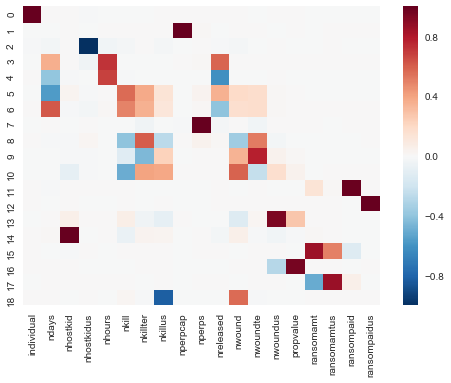

In [44]:
sb.heatmap(components)
sb.set_style('whitegrid')
plt.show()